In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
########Read in data from Gouwens & Sorensen et al., 2020
ivscc_shiny = pd.read_csv("./inh_ivscc_shiny_ttype_and_quality.csv")
ivscc_met_types = pd.read_csv('./20200711_patchseq_metadata_mouse.csv')[['cell_specimen_id','MET-type Label']]
########Read in cell type ids for each predicted MET-type
em_labels_11 = pd.read_csv('./EM_MC_Predicted_MET_Labels_11_18_22_v1_gr55prob.csv')[['id', 'predicted_MET-type Label']]
print (pd.read_csv('./EM_MC_Predicted_MET_Labels_11_18_22_v1_gr55prob.csv'))
ivscc_labels = ivscc_shiny.merge(ivscc_met_types,left_on='spec_id_label',right_on='cell_specimen_id')
ivscc_labels = ivscc_labels[ivscc_labels['Tree_call_label']!="PoorQ"]

### Read in morpho features from Gouwens & Sorensen et al., 2020 and EM MC features & merge into one df
ivscc_features = pd.read_csv("./IVSCC_features/RawFeatureWide.csv")
em_features = pd.read_csv("./EM_MC_features/big_batch_v1/11_18_22_RawFeatureWide.csv")
ivscc_merged = ivscc_features.merge(ivscc_labels,left_on='specimen_id',right_on='spec_id_label')
ivscc_merged["method"] = 1
em_merged = em_features.merge(em_labels_11, left_on = 'specimen_id', right_on= 'id')
em_merged = em_merged.rename(columns = {'predicted_MET-type Label':'MET-type Label'})
em_merged["method"] = 2
###label datasets by technique used to collect
ivscc_merged["Tech"] = "Patch-seq"
em_merged["Tech"] = "EM"

features_concat = pd.concat([em_merged, ivscc_merged], ignore_index = True, sort = False)
##exclude features not measured in EM
features_concat = features_concat.drop(columns = ['basal_dendrite_mean_diameter', 'basal_dendrite_total_surface_area','soma_surface_area'])



    Unnamed: 0                  id predicted_MET-type Label  probability Area
0            0  864691135013417622                Sst-MET-4        1.000   V1
1            8  864691135467660940                Sst-MET-4        1.000   V1
2           11  864691135699487522                Sst-MET-8        1.000   V1
3           14  864691135925834510                Sst-MET-8        1.000   V1
4           19  864691136118647832                Sst-MET-4        1.000   V1
5            9  864691135544588584                Sst-MET-8        0.998   V1
6           10  864691135577202181                Sst-MET-4        0.998   V1
7            6  864691135374222153                Sst-MET-6        0.996   V1
8           18  864691136116457636                Sst-MET-6        0.996   V1
9            1  864691135058985115                Sst-MET-6        0.994   V1
10          12  864691135754152141                Sst-MET-5        0.990   V1
11          16  864691135988665856                Sst-MET-6     

axon_bias_x
axon_bias_y
axon_depth_pc_0
axon_depth_pc_1
axon_depth_pc_2
axon_depth_pc_3
axon_depth_pc_4
axon_emd_with_basal_dendrite
axon_exit_distance
axon_exit_theta
axon_extent_x
axon_extent_y
axon_frac_above_basal_dendrite
axon_frac_below_basal_dendrite
axon_frac_intersect_basal_dendrite
axon_max_branch_order
axon_max_euclidean_distance
axon_max_path_distance
axon_mean_contraction
axon_num_branches
axon_soma_percentile_x
axon_soma_percentile_y
axon_total_length
basal_dendrite_bias_x
basal_dendrite_bias_y
basal_dendrite_calculate_number_of_stems
basal_dendrite_extent_x
basal_dendrite_extent_y
basal_dendrite_frac_above_axon
basal_dendrite_frac_below_axon
basal_dendrite_frac_intersect_axon
basal_dendrite_max_branch_order
basal_dendrite_max_euclidean_distance
basal_dendrite_max_path_distance
basal_dendrite_mean_contraction
basal_dendrite_num_branches
basal_dendrite_soma_percentile_x
basal_dendrite_soma_percentile_y
basal_dendrite_stem_exit_down
basal_dendrite_stem_exit_side
basal_dendr

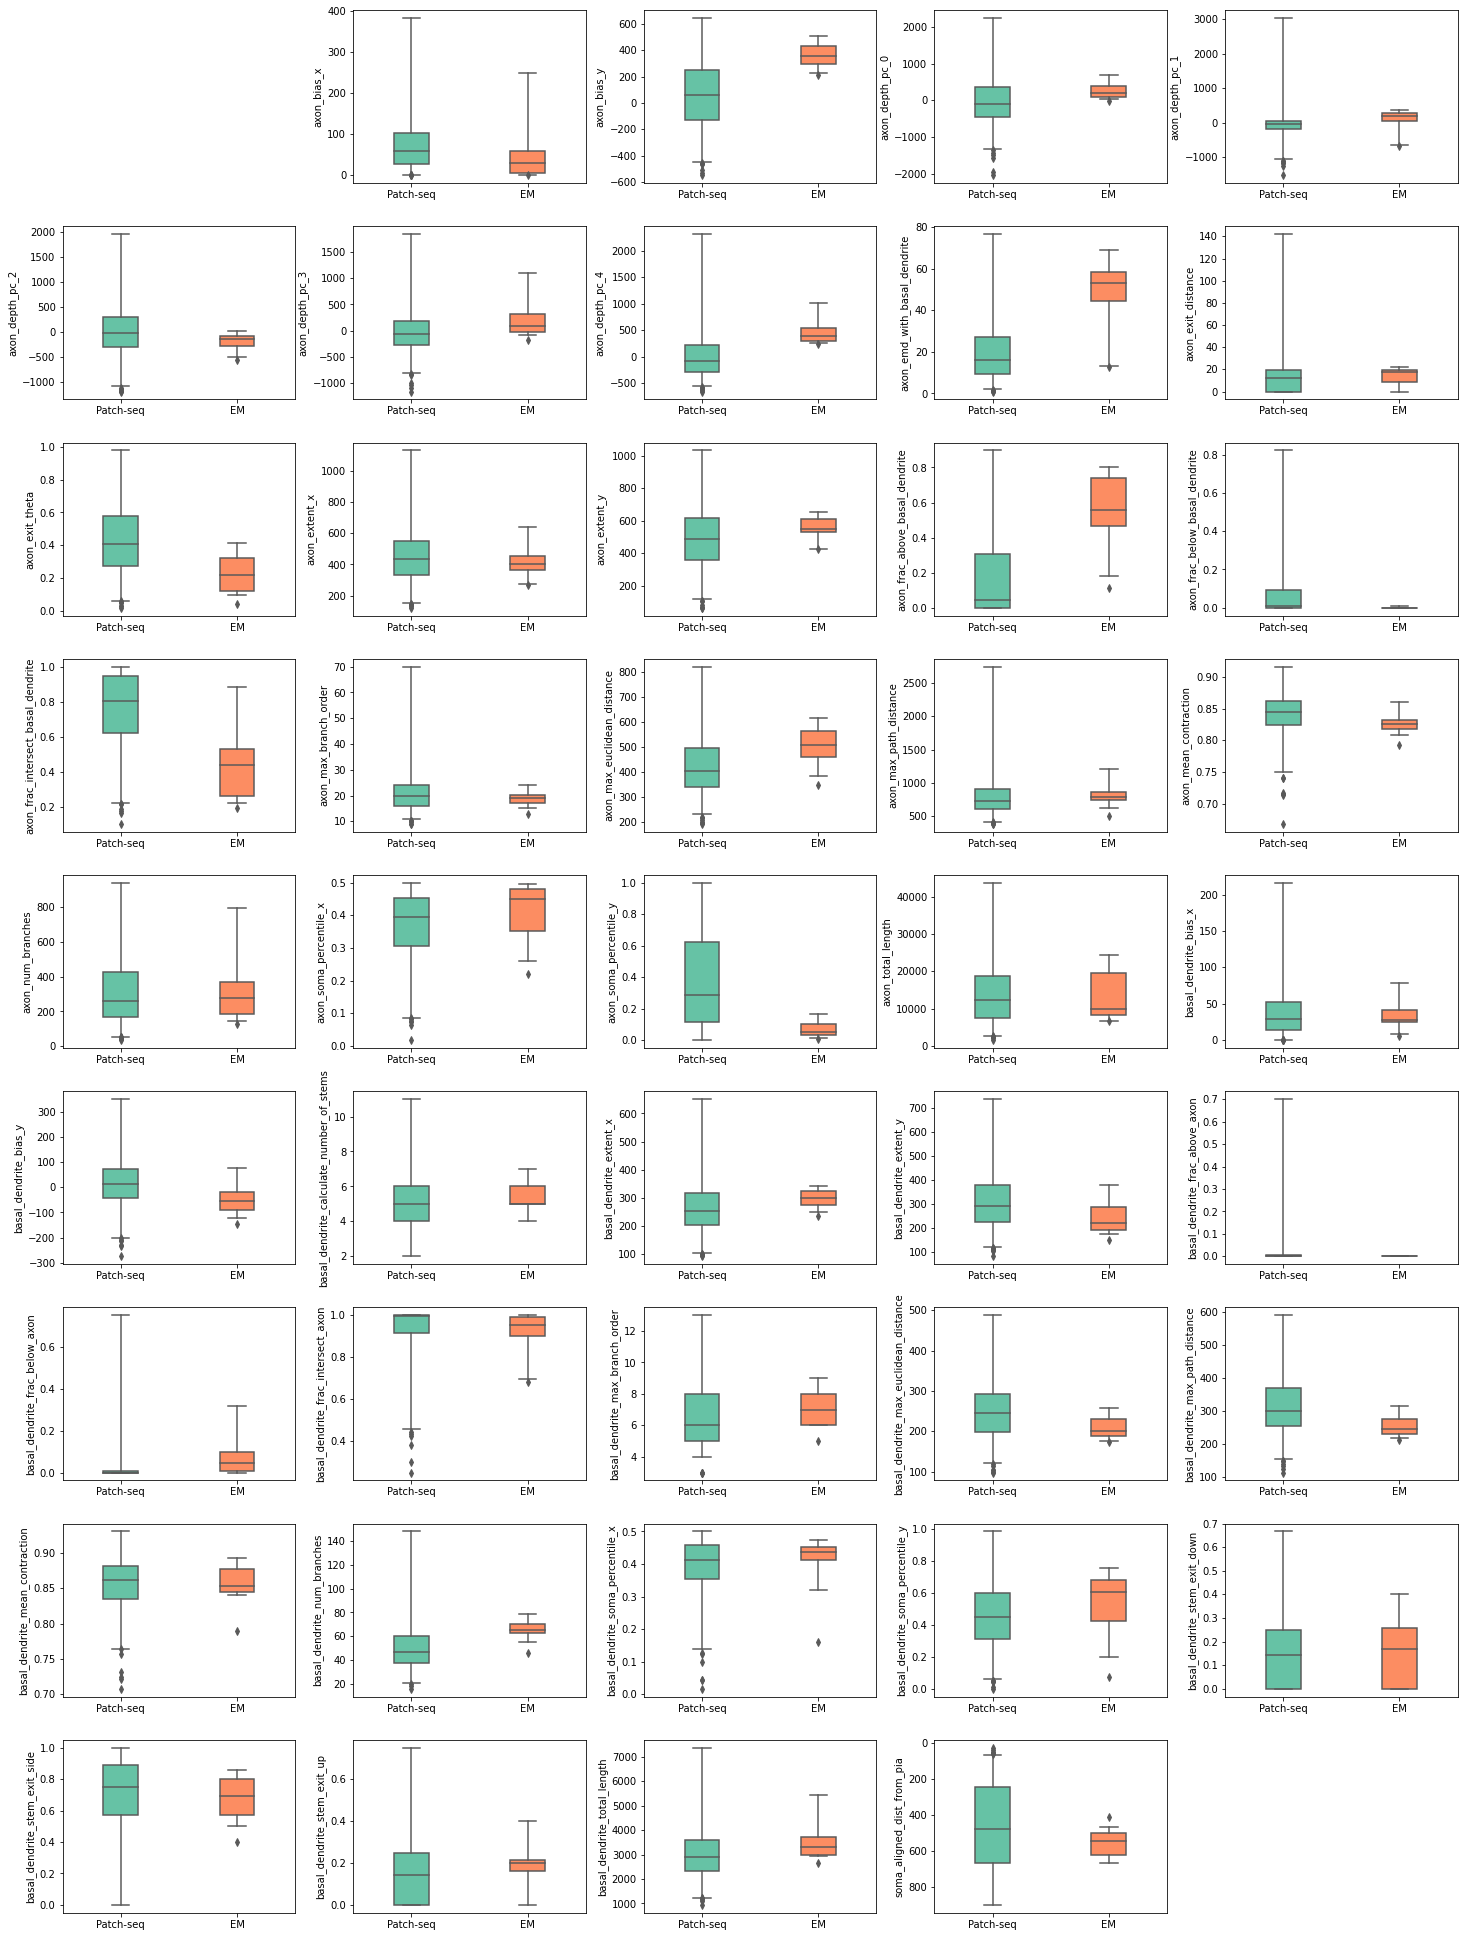

In [23]:
###plot patchseq vs EM
features_concat_minus = features_concat.drop(columns = ['specimen_id', 'MET-type Label', 'id', 'method'])
plt.figure(figsize = (25,35))
plt.subplots_adjust(hspace = 0.25)
plt.subplots_adjust(wspace = 0.25)

column_list = ['axon_bias_x',
'axon_bias_y',
'axon_depth_pc_0',
'axon_depth_pc_1',
'axon_depth_pc_2',
'axon_depth_pc_3',
'axon_depth_pc_4',
'axon_emd_with_basal_dendrite',
'axon_exit_distance',
'axon_exit_theta',
'axon_extent_x',
'axon_extent_y',
'axon_frac_above_basal_dendrite',
'axon_frac_below_basal_dendrite',
'axon_frac_intersect_basal_dendrite',
'axon_max_branch_order',
'axon_max_euclidean_distance',
'axon_max_path_distance',
'axon_mean_contraction',
'axon_num_branches',
'axon_soma_percentile_x',
'axon_soma_percentile_y',
'axon_total_length',
'basal_dendrite_bias_x',
'basal_dendrite_bias_y',
'basal_dendrite_calculate_number_of_stems',
'basal_dendrite_extent_x',
'basal_dendrite_extent_y',
'basal_dendrite_frac_above_axon',
'basal_dendrite_frac_below_axon',
'basal_dendrite_frac_intersect_axon',
'basal_dendrite_max_branch_order',
'basal_dendrite_max_euclidean_distance',
'basal_dendrite_max_path_distance',
'basal_dendrite_mean_contraction',
'basal_dendrite_num_branches',
'basal_dendrite_soma_percentile_x',
'basal_dendrite_soma_percentile_y',
'basal_dendrite_stem_exit_down',
'basal_dendrite_stem_exit_side',
'basal_dendrite_stem_exit_up',
'basal_dendrite_total_length', 'soma_aligned_dist_from_pia']
i = 0
for n in column_list:
    i = i+1
#     print (n)
    afont = {'fontname': 'arial'}
    order = ['Patch-seq', 'EM']
    ax = plt.subplot(9,5, i+1)
    sns.boxplot(x= "Tech", y = n, data = features_concat_minus, saturation = 1, width = 0.3, order = order, whis = [1,100], palette = "Set2", ax = ax)

    ax.set(xlabel=None)
    if 'soma_aligned_dist_from_pia' in n:
        plt.gca().invert_yaxis()
# plt.savefig('PatchvsEM_boxsplot_11_18files_skelkeys_wis0100_312.png', bbox_inches = 'tight',  facecolor='w')


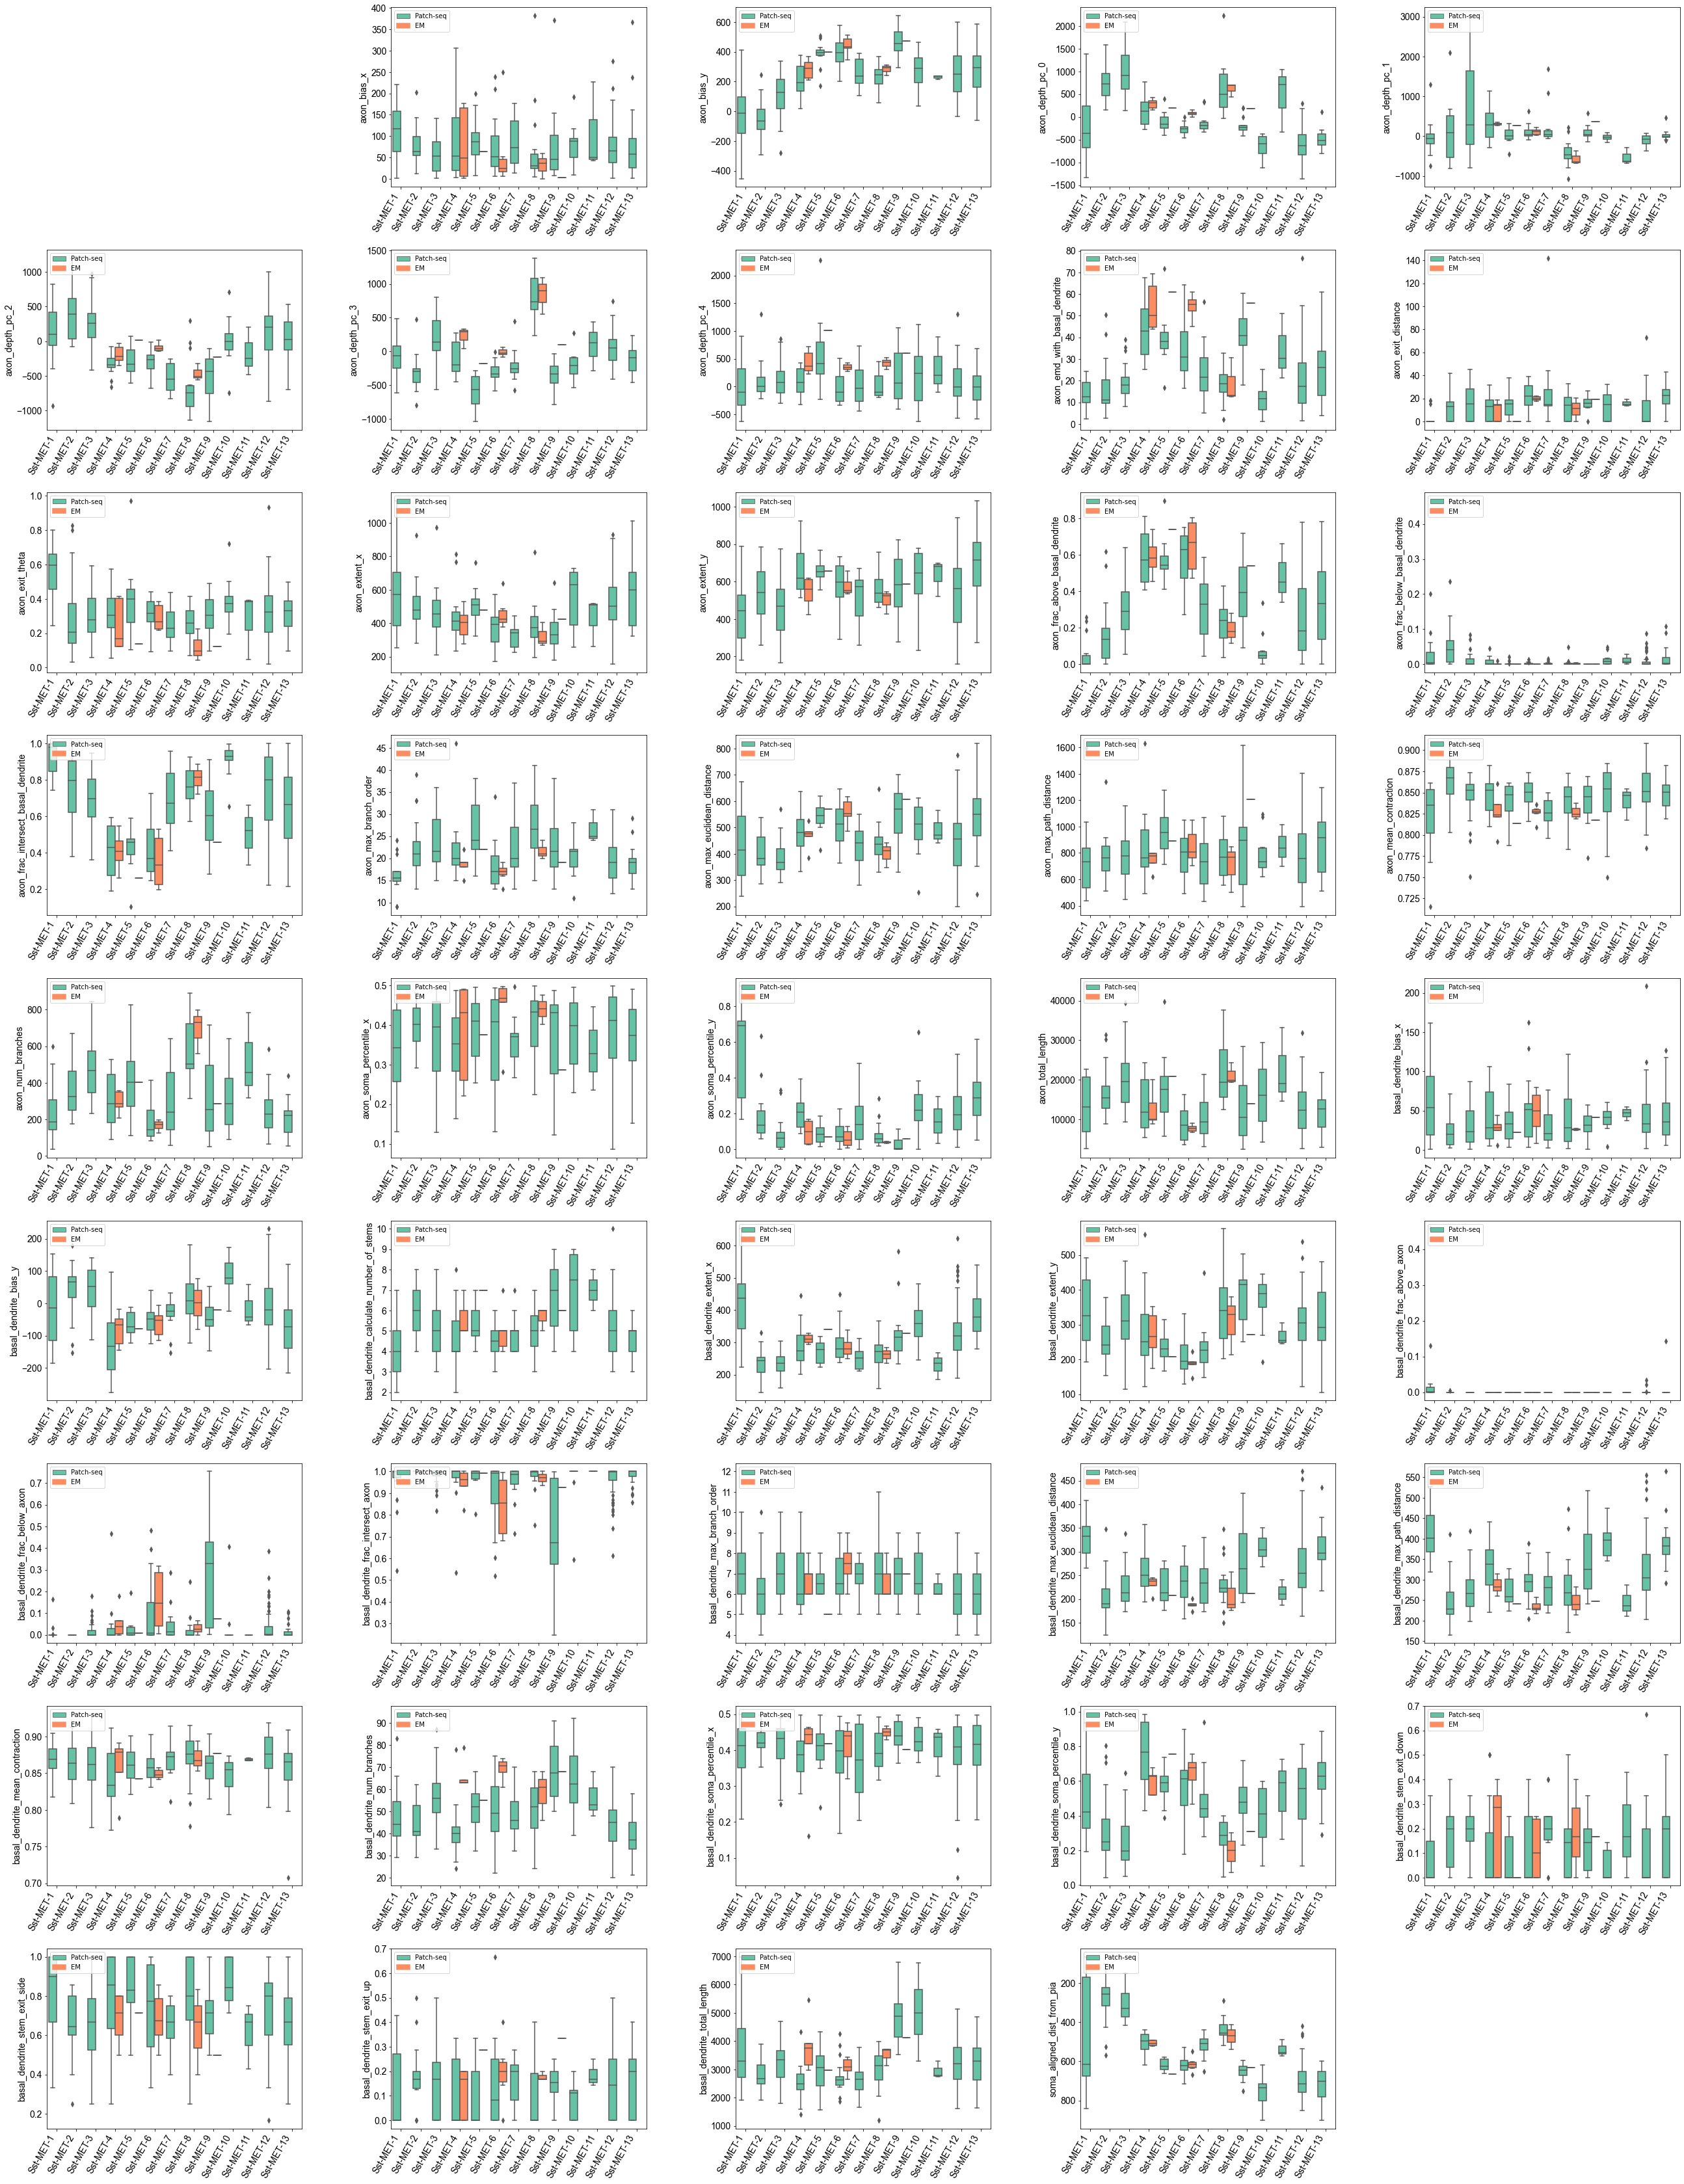

In [38]:
###plot patchseq met types vs EM met types

sst_features = features_concat[features_concat["MET-type Label"].str.contains('Sst|EM', na = False)]

# sstmetpalette2= ['#b9bb67', '#804811', '#CC6D3D','#f9a072','#fbc6aa','#FFDF11','#ffeb70','#D6C300', '#e6db66','#BF9F00', '#806B19', '#b2a675','#BF8219', '#d8b475','#802600','#FFBB33','#B95541','#C11331','#fc8d62']

# sstmet45689= ['#f9a072','#fbc6aa','#FFDF11','#ffeb70','#D6C300', '#e6db66', '#806B19', '#b2a675','#BF8219', '#d8b475']
plt.figure(figsize = (45,60))
plt.subplots_adjust(hspace = 0.35)
plt.subplots_adjust(wspace = 0.35)
order1 = ["Sst-MET-1", "Sst-MET-2", "Sst-MET-3", "Sst-MET-4","Sst-MET-5","Sst-MET-6","Sst-MET-7","Sst-MET-8","Sst-MET-9","Sst-MET-10","Sst-MET-11", "Sst-MET-12","Sst-MET-13"]

i = 0
for n in column_list:
    i = i+1
    afont = {'fontname': 'arial'}

    ax = plt.subplot(9,5, i+1)
    afont = {'fontname': 'arial'} 

    sns.boxplot(x= "MET-type Label", y = n, hue = "method", data = sst_features, palette = "Set2", saturation = 1, order = order1, ax = ax)
    ax.set(xlabel=None)
    ax.set_ylabel(n, fontsize =14, **afont)
  
    plt.xticks (fontsize =14, rotation = 60, **afont, ha = "right")
    plt.yticks (fontsize =14, **afont, visible = True)
    plt.legend(title='', loc='upper left', labels=['Patch-seq', 'EM'])

    leg = ax.get_legend()
    leg.legendHandles[1].set_color('#fc8d62')
    if 'soma_aligned_dist_from_pia' in n:
        plt.gca().invert_yaxis()
# plt.savefig('Sst_PatchvsEM_MET_types_boxsplot_11_18files_skelkeys_wis0_100_312.png', bbox_inches = 'tight',  facecolor='w')
#     plt.close()

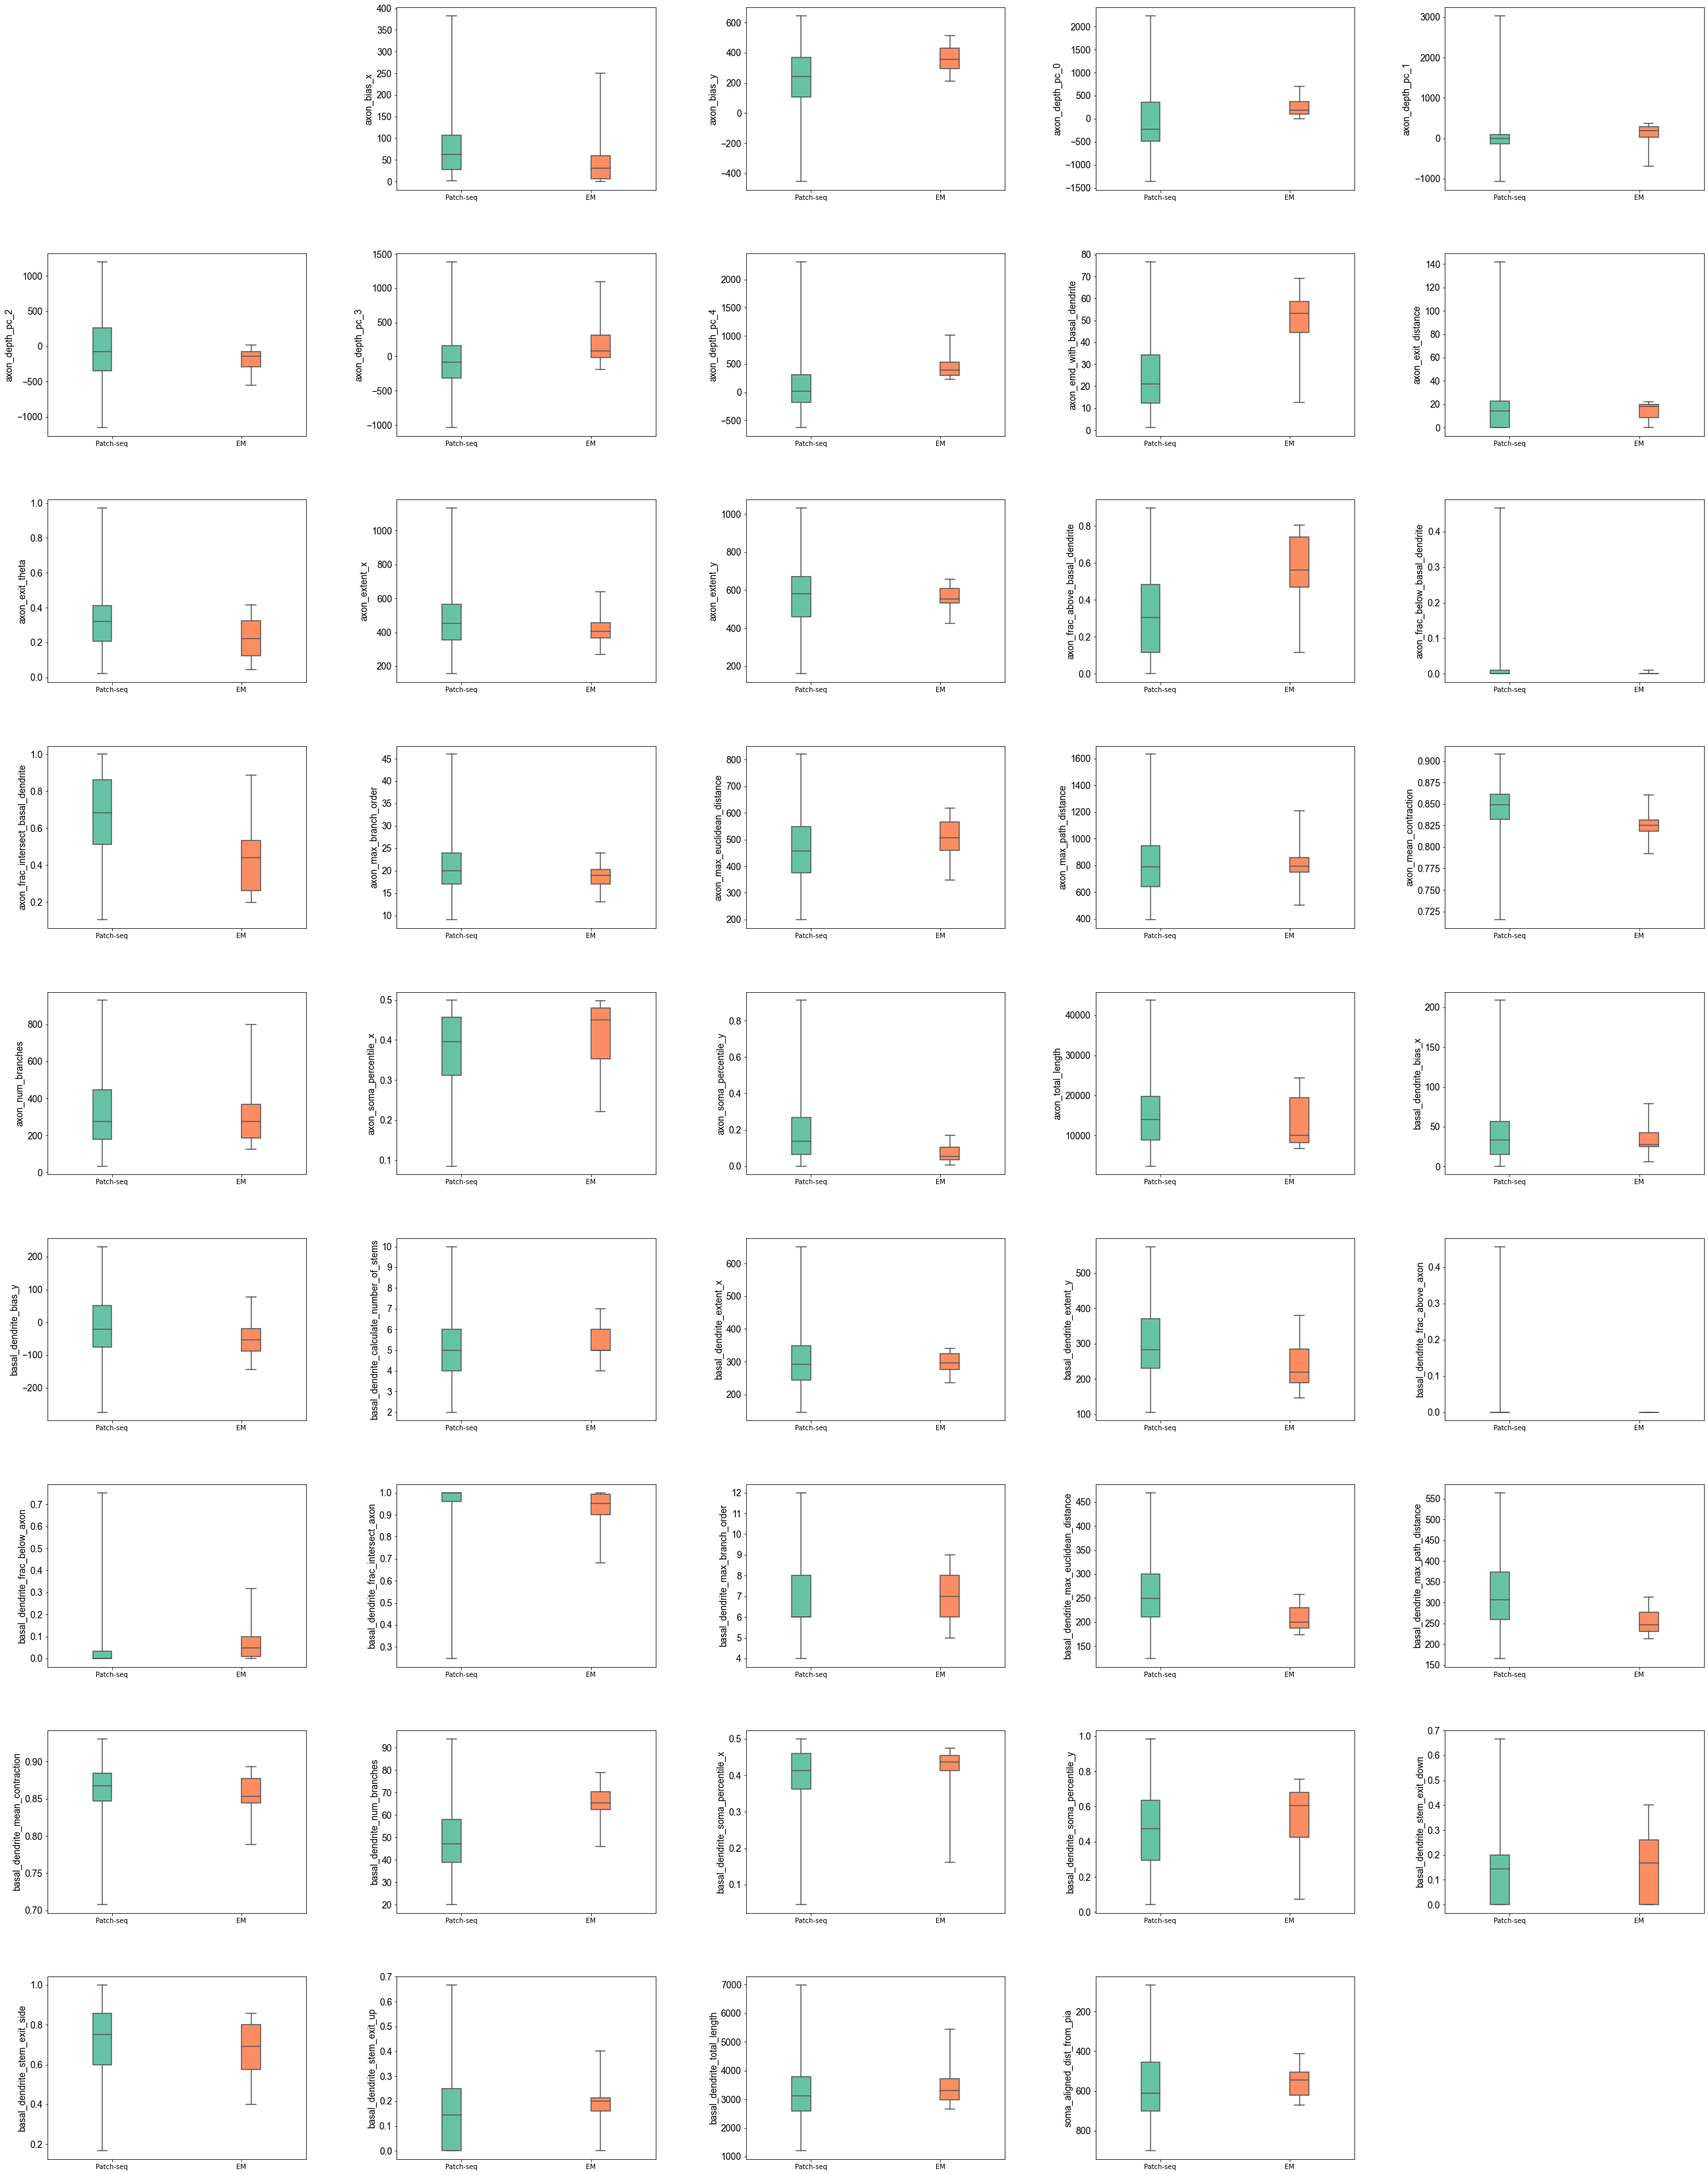

In [36]:
###plot patchseq met types vs EM met types

sst_features = features_concat[features_concat["MET-type Label"].str.contains('Sst|EM', na = False)]
plt.figure(figsize = (45,60))
plt.subplots_adjust(hspace = 0.35)
plt.subplots_adjust(wspace = 0.35)

i = 0
for n in column_list:
    i = i+1
#     print (n)
    afont = {'fontname': 'arial'}

    ax = plt.subplot(9,5, i+1)
    afont = {'fontname': 'arial'} 
    sns.boxplot(x= "Tech", y = n, hue = "method", data = sst_features, width = 0.3, whis = [0,100], palette = "Set2", saturation = 1, order = order, ax = ax)

    ax.set(xlabel=None)
    ax.set_ylabel(n, fontsize =14, **afont)
  
    plt.yticks (fontsize =14, **afont, visible = True)
    ax.get_legend().remove()

    if 'soma_aligned_dist_from_pia' in n:
        plt.gca().invert_yaxis()
# plt.savefig('Sst_PatchvsEM_boxsplot_11_18files_skelkeys_wis0_100_312.png', bbox_inches = 'tight',  facecolor='w')
#     plt.close()